In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def sigmoid(Y_in):
    return 1 / (1 + np.exp(-Y_in))

In [3]:
def find_Yhat(X, w, b):
    # IF LIST OF LIST / LIST OF TUPLE IS USED, THEN INDIVIDUAL LIST/TUPLE SHOULD BE HANDLED DIFFERENTLY
    if type(X) in [type([1]), type((1,2))]:
        Y_in = np.dot(X, w) + b
    else:
        Y_in = X * w + b

    return sigmoid(Y_in)

In [4]:
def delta_w(X, Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred) * X

In [5]:
def delta_b(Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred)

In [6]:

X = [0.5, 2.5]
Y = [0.2, 0.9]

In [7]:
n_epochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9


### **ADAGRAD**

*UPDATE WEIGHTS AFTER EACH ROWS WITH CHANGING LEARNING RATE*

In [8]:
def adagrad(X, Y, noofepochs = 300):
    w = -2; alpha = 1; b = -2;
    e = 0.5

    # LIST FOR ALL EPOCHS
    error_mega_list = []
    weights_mega_list = []
    bias_mega_list = []
        
    for i in range(noofepochs):
        # LIST FOR EACH EPOCH
        error_list = []
        dw2 = 0
        db2 = 0

        for x, y in zip(X, Y):
            Y_hat = find_Yhat(x, w, b)
            error_list.append((y - Y_hat) ** 2)

            dw = delta_w(x, y, Y_hat)
            dw2 += dw**2
            
            db = delta_b(y, Y_hat)
            db2 += db**2

            w += (-alpha / (dw2 + e)**0.5) * dw
            b += (-alpha / (db2 + e)**0.5) * db


        error_mega_list.append(error_list)
        weights_mega_list.append(w)
        bias_mega_list.append(b)
        
    return error_mega_list, weights_mega_list, bias_mega_list

In [9]:
errors_adag, weights_adag, biases_adag = adagrad(X, Y, n_epochs)

In [13]:
weights_adag

[-1.9842075458858892,
 -1.9678519393869778,
 -1.9508916891331254,
 -1.9332804363446674,
 -1.914966148879822,
 -1.8958901403624362,
 -1.8759858669357394,
 -1.8551774385751831,
 -1.8333777601724828,
 -1.8104861869690367,
 -1.7863855350685773,
 -1.7609382239761193,
 -1.7339812336806741,
 -1.7053194162667176,
 -1.674716482263977,
 -1.64188263497224,
 -1.6064572636374614,
 -1.5679841677521107,
 -1.5258751656387775,
 -1.4793550413674337,
 -1.427375368448544,
 -1.3684741311923927,
 -1.3005360650369955,
 -1.2203600901451108,
 -1.1228252816283246,
 -0.9991542138714503,
 -0.8329878300552078,
 -0.5910661044367232,
 -0.20582034808107552,
 0.3832720130672044,
 0.8636631902155496,
 0.9039774615490472,
 0.9554087241048996,
 1.0045533417644703,
 1.0499975063438107,
 1.0918464090293734,
 1.1303964701887466,
 1.1659570810985251,
 1.1988188102506363,
 1.2292463708383232,
 1.2574776818690592,
 1.2837250424413256,
 1.308177155312956,
 1.3310014484500245,
 1.3523464164653514,
 1.3723438397279413,
 1.3911108

In [12]:
errors_adag

[[0.023278864175627943, 0.8082875565652029],
 [0.02286424698737442, 0.8081778602199684],
 [0.022430931367800243, 0.8080574056490307],
 [0.021977737638124262, 0.8079247454196165],
 [0.021503391778207422, 0.807778179042939],
 [0.02100651612987797, 0.8076156973044984],
 [0.02048561893013737, 0.8074349115221752],
 [0.019939082472771284, 0.8072329627959168],
 [0.019365149650649758, 0.8070064043852224],
 [0.018761908573368593, 0.8067510475363411],
 [0.0181272748845987, 0.8064617569043971],
 [0.01745897132146747, 0.8061321754054641],
 [0.016754503971047975, 0.8057543486125531],
 [0.01601113460657715, 0.8053182035102936],
 [0.015225848479039562, 0.804810811771016],
 [0.014395317117962539, 0.8042153269426334],
 [0.01351585633420795, 0.8035094155184032],
 [0.012583381349391326, 0.802662879755067],
 [0.011593365269371962, 0.8016339473191096],
 [0.010540817464864852, 0.8003632790697742],
 [0.009420323418550251, 0.7987639008489913],
 [0.008226249397011352, 0.7967034828781323],
 [0.00695337432270155

In [14]:
print(round(np.mean(errors_adag[-1]),5))
print(round(weights_adag[-1],4))
print(round(biases_adag[-1],3))

0.0
1.7916
-2.282


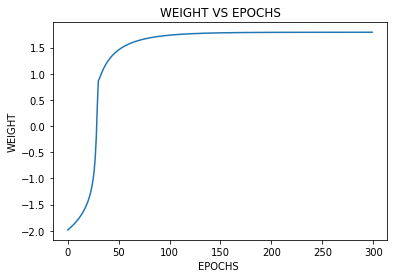

In [11]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in weights_adag]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()